In [5]:
from scipy.io import wavfile
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq


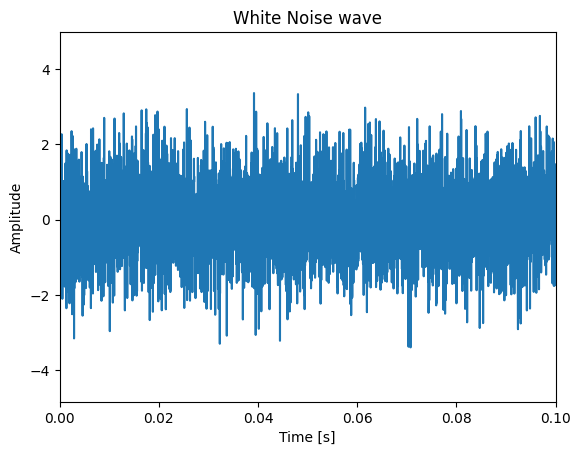

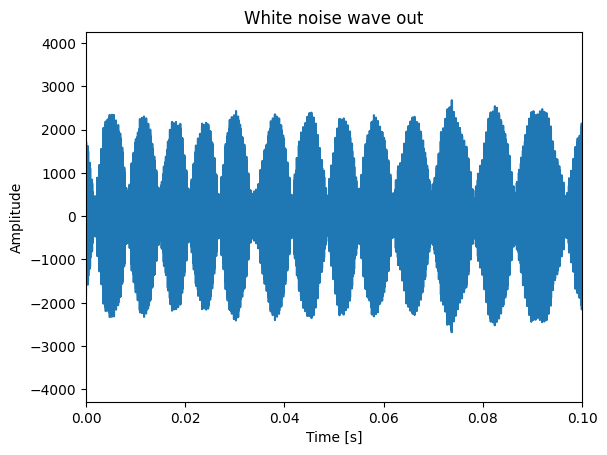

In [6]:
white_path = 'inputs/white_noise.wav'
white_out_path = 'white aup/white_noise_out.wav'

white_rate, white = wavfile.read(white_path)
white_out_rate, white_out = wavfile.read(white_out_path)



#plot white
t = np.linspace(0, len(white)/white_rate, len(white))
plt.figure()
plt.plot(t,white)
plt.title('White Noise wave')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.xlim(0, 0.1)
plt.show()

#plot white out
t = np.linspace(0, len(white_out)/white_out_rate, len(white_out))
plt.figure()
plt.plot(t,white_out)
plt.title('White noise wave out')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.xlim(0, 0.1)
plt.show()






In [7]:
def apply_fft(data, sample_rate):
    # Perform FFT
    N = len(data)
    yf = fft(data)

    # obtener frecuencias
    xf = fftfreq(N, 1 / sample_rate)

    # Calcular magnitud y fase
    magnitude = np.abs(yf)
    phase = np.angle(yf)

    return xf[:N // 2], magnitude[:N // 2], phase[:N // 2] # devolver solo frecuencias positivas

# Dibuja el diagrama de Bode
def plot_bode(frequencies, magnitude, phase):
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6))

    # dibujar magnitud
    ax1.plot(frequencies, 20 * np.log10(magnitude))
    ax1.set_title('Bode Diagram')
    ax1.set_ylabel('Magnitude (dB)')
    ax1.set_xscale('log')
    ax1.grid()

    # dibujar fase
    ax2.plot(frequencies, phase * 180 / np.pi)
    ax2.set_ylabel('Phase (degrees)')
    ax2.set_xlabel('Frequency (Hz)')
    ax2.set_xscale('log')
    ax2.grid()

    plt.tight_layout()
    plt.show()

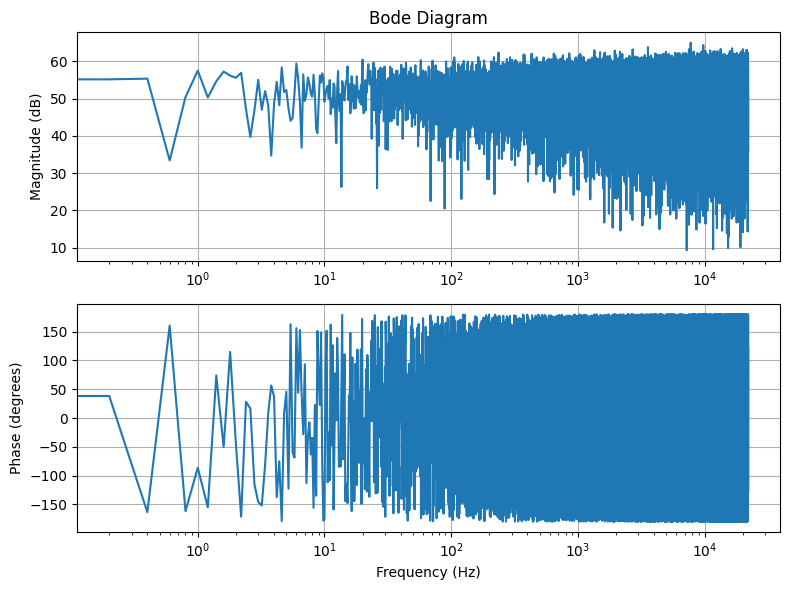

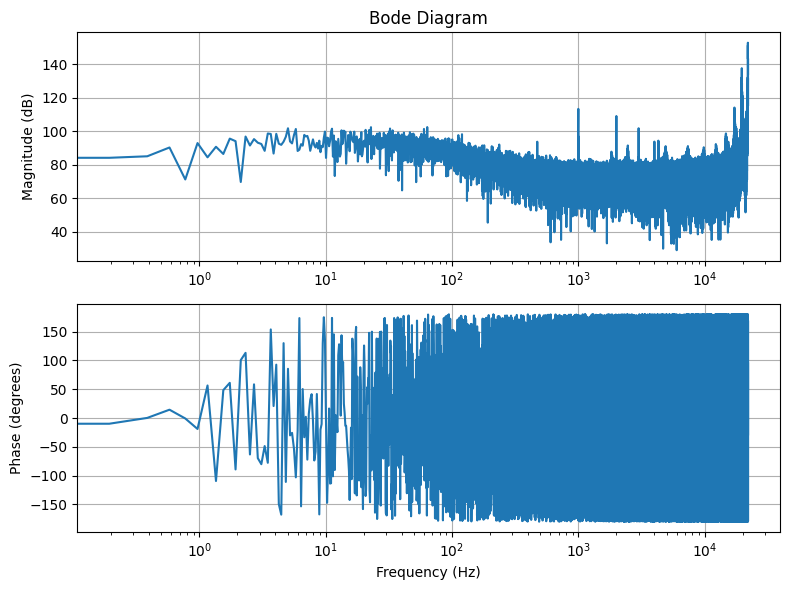

In [8]:
#plot bode white
frequencies, magnitude, phase = apply_fft(white, white_rate)
plot_bode(frequencies, magnitude, phase)

#plot bode white out
frequencies, magnitude, phase = apply_fft(white_out, white_out_rate)
plot_bode(frequencies, magnitude, phase)
